## Ordinal Classification using mord Package

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import mord
from sklearn import linear_model, metrics, preprocessing

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Data Import
df = pd.read_csv('../../../data/copenhagen_housing_survey.csv')
df.shape

(72, 5)

## Data preprocessing

In [27]:
# Duplicates dropping
df.drop_duplicates(inplace=True)
df.shape

(72, 5)

In [28]:
# Check Null Data
df.isnull().sum()

Sat     0
Infl    0
Type    0
Cont    0
Freq    0
dtype: int64

## Balancing the dataset:SMOTE

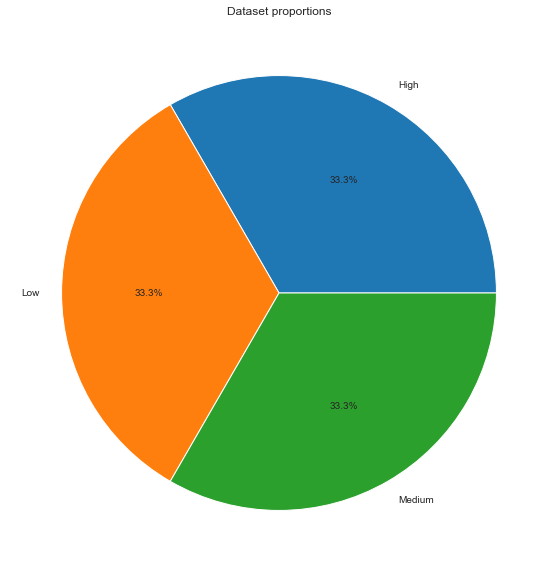

In [29]:
# Notice how unbalanced is the dataset
labels, counts = np.unique(df.Sat, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

We observe that data is already balanced.

## Data Mapping

In [30]:
x = df.drop('Sat', axis=1)
y = df.Sat

In [31]:
list(x["Type"].unique())

['Tower', 'Apartment', 'Atrium', 'Terrace']

In [32]:
x['Infl'].replace(list(x["Infl"].unique()), [i for i in range(len(x["Infl"].unique()))], inplace=True)

In [33]:
x['Cont'].replace(list(x["Cont"].unique()), [i for i in range(len(x["Cont"].unique()))], inplace=True)

In [34]:
x['Type'].replace(list(x["Type"].unique()), [i for i in range(len(x["Type"].unique()))], inplace=True)

In [35]:
x.head(10)

,Infl,Type,Cont,Freq
0,0,0,0,21
1,0,0,0,21
2,0,0,0,28
3,1,0,0,34
4,1,0,0,22
5,1,0,0,36
6,2,0,0,10
7,2,0,0,11
8,2,0,0,36
9,0,1,0,61


## Check Correlated Features

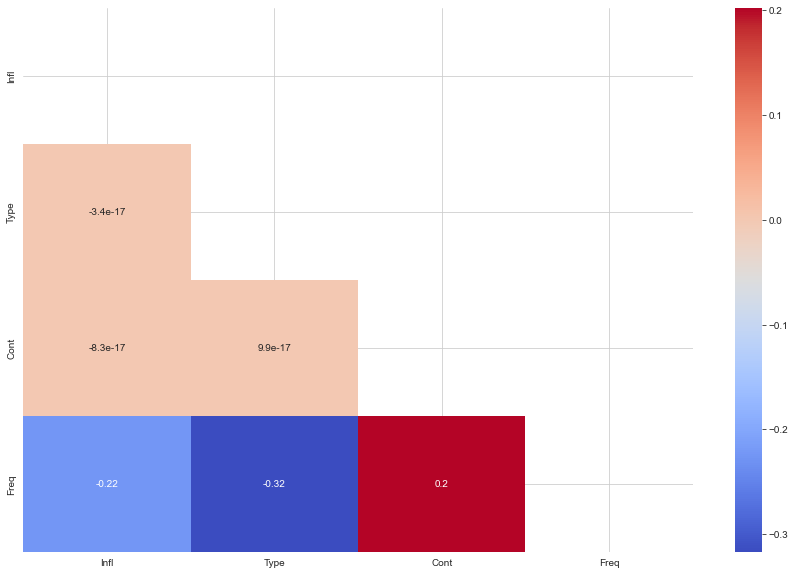

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=x.corr(), cmap='coolwarm', mask=np.triu(x.corr()), annot=True)
plt.show()

No correlated features observed.